# Image-processing code to match images in mean luminance, RMS contrast, and/or generate phase-scrambled versions
begun 27-08-2021 for V4 material representation project with Gerick Lee

In [9]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
%matplotlib inline

## Point to image directory and load all images

In [146]:
imdir = './sample_set_20210826/'

In [147]:
# find image files that have been saved in greyscale in PNG format (for example)
im_files = glob.glob(os.path.join(imdir,'*BW.png'))
im_files

['./sample_set_20210826\\MUIR_full_gloss_.5cm_reliefBW.png',
 './sample_set_20210826\\MUIR_full_gloss_6cm_reliefBW.png',
 './sample_set_20210826\\MUIR_full_matte_.5cm_reliefBW.png',
 './sample_set_20210826\\MUIR_full_matte_6cm_relief_BW.png',
 './sample_set_20210826\\VENICE_full_gloss_0.5cm_reliefBW.png',
 './sample_set_20210826\\VENICE_full_gloss_6cm_reliefBW.png',
 './sample_set_20210826\\VENICE_full_matte_0.5cm_reliefBW.png',
 './sample_set_20210826\\VENICE_full_matte_6cm_reliefBW.png']

In [148]:
# load those files in a list
# nb. "converting" to greyscale here just collapses them to a single channel
images = [cv2.cvtColor(cv2.imread(file), cv2.COLOR_RGB2GRAY)/255 for file in im_files]

## Match mean luminance and RMS contrast of N images
RMS contrast definition: Standard Deviation of pixel intensities, assuming intensities have black-white range of 0-1

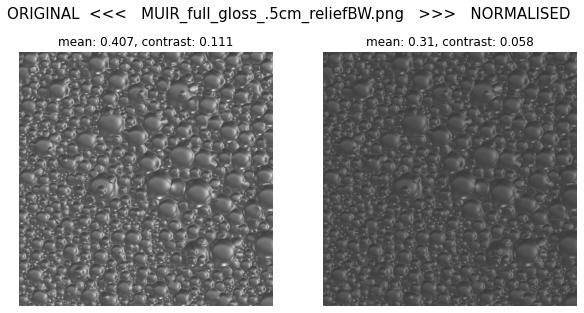

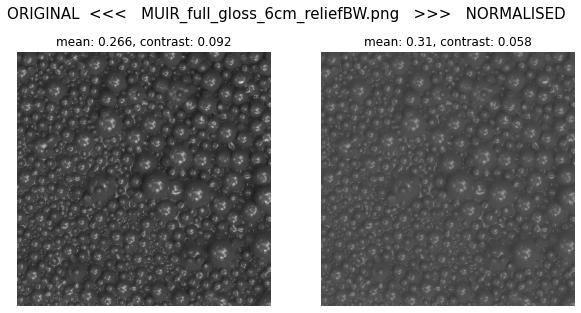

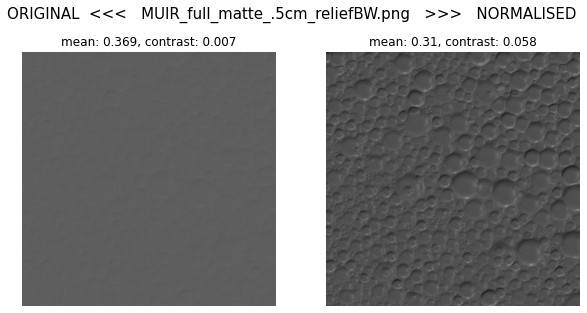

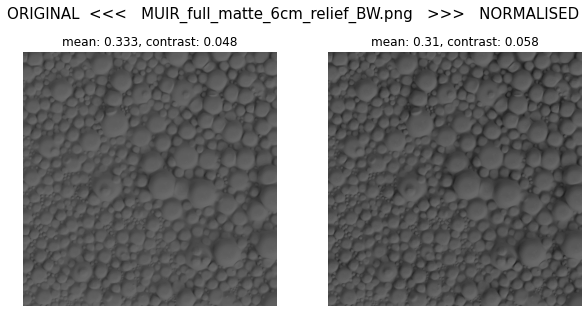

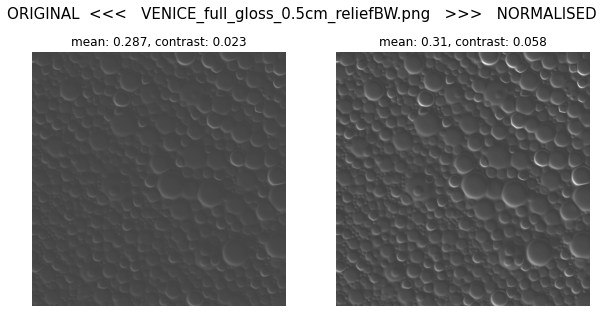

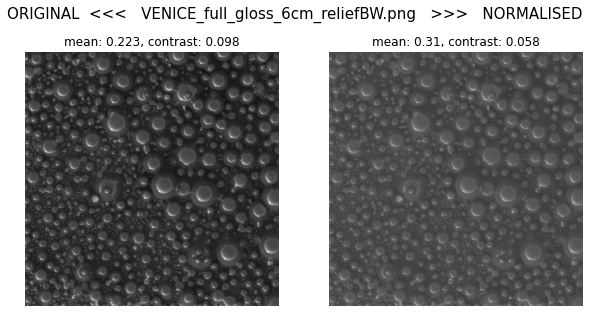

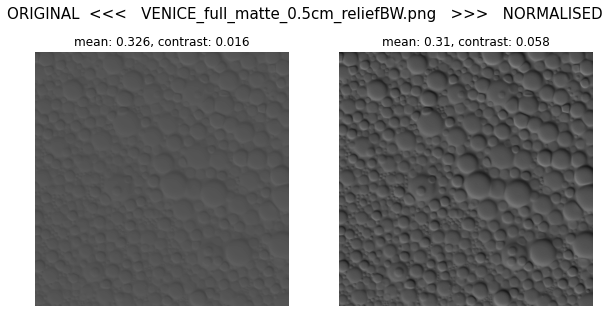

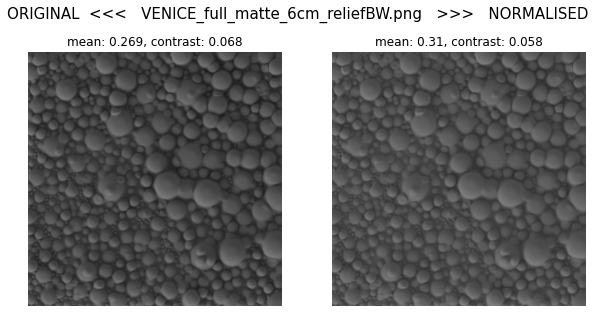

In [157]:
# first calculate the original mean luminance and RMS contrast of each image
mean_lum_list = [im.mean() for im in images]
rms_list = [im.std() for im in images]

# now generate a version where those values are normalised to match the mean across original images
count = 0
for im in images:
    
    # normalise mean luminance to match set of images
    _im = im - (im.mean()-np.mean(mean_lum_list))
    new_mean = _im.mean()

    # normalise RMS contrast to match set of images
    _im = _im - _im.mean()
    _im = _im/(_im.std()/np.mean(rms_list))
    _im = _im + new_mean
    
    fig, axes = plt.subplots(1,2, figsize=(10,5))
    
    axes[0].imshow(im, cmap='gray', vmin=0, vmax=1)
    axes[0].set_title('mean: {}, contrast: {}'.format(np.round(im.mean(),3), np.round(im.std(),3)))
    axes[0].axis('off')
    
    axes[1].imshow(_im, cmap='gray', vmin=0, vmax=1)
    axes[1].set_title('mean: {}, contrast: {}'.format(np.round(_im.mean(),3), np.round(_im.std(),3)))
    axes[1].axis('off')
    
    plt.suptitle('ORIGINAL  <<<   {}   >>>   NORMALISED'.format(im_files[count].split("\\")[-1]), fontsize=15)
    plt.show()
    
    count+=1